<a href="https://colab.research.google.com/github/limrome/Regression-analysis/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df=pd.read_csv('synthetic_health_data.csv')
df

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


In [ ]:
# Посмотрим, с каким типом переменных предстоит работать
# для этого есть метод .info()
df.info()

print("Количество пропущенных значений:\n", df.isnull().sum())  # Подсчет пропусков

# Помимо этого, мы можем посмотреть основные статистические показатели (summary statistics):
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
Количество пропущенных значений:
 Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


               Age          BMI  Exercise_Frequency  Diet_Quality  \
count  1000.000000  1000.000000         1000.000000   1000.000000   
mean     40.231985    25.354181            2.888000     69.952977   
std      11.750591     4.987272            1.995354     14.972061   
min       1.104792    10.298057            0.000000     19.907497   
25%      32.228916    21.968792            1.000000     59.945481   
50%      40.303607    25.315386            3.000000     69.975151   
75%      47.775327    28.644411            5.000000     80.527839   
max      86.232778    40.965538            6.000000    110.265186   

       Sleep_Hours  Smoking_Status  Alcohol_Consumption  Health_Score  
count  1000.000000     1000.000000          1000.000000   1000.000000  
mean      6.973135        0.499000             3.079377     85.479947  
std       1.517218        0.500249             2.084564     13.633845  
min       2.431107        0.000000            -3.592506     29.106017  
25%       5.903351

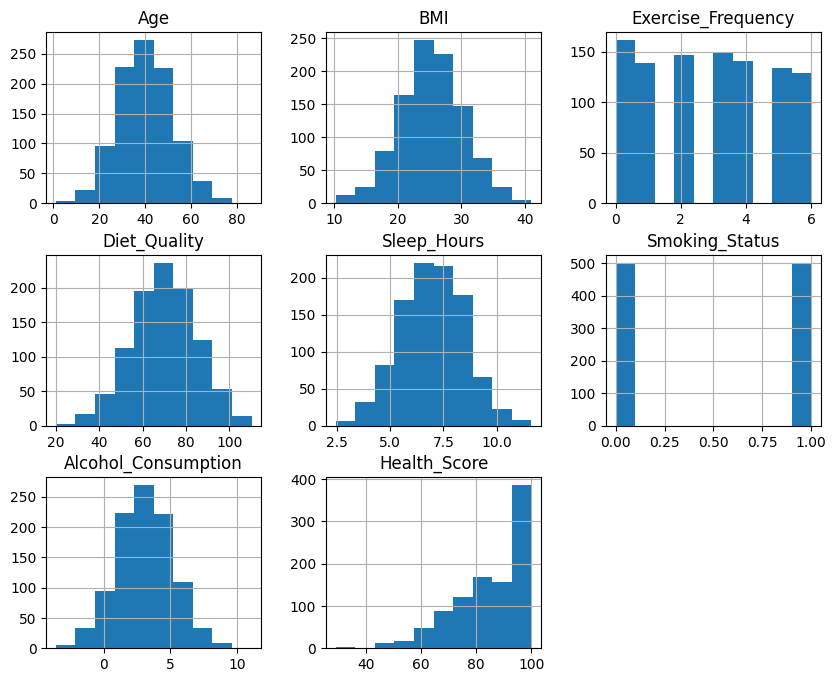

In [ ]:
print(df.describe())
df.hist(figsize=(10, 8))
plt.show()



Этот набор данных предназначен для изучения влияния различных факторов образа жизни на показатели здоровья человека с помощью линейного регрессионного анализа. Он даёт полное представление о таких факторах, как возраст, индекс массы тела, частота физических упражнений, качество питания, продолжительность сна, статус курения и употребление алкоголя. Набор данных можно использовать для исследовательского анализа данных, создания моделей машинного обучения и изучения взаимосвязей между здоровьем и образом жизни.

***Описание столбцов***
    
    1) Age (Возраст): Возраст человека в годах (непрерывная переменная).
    2) BMI (ИМТ): Индекс массы тела индивидуума (непрерывная переменная).
    3) Exercise_Frequency (Частота_упражнений): количество дней в неделю, в течение которых выполняются отдельные упражнения (категориальный тип, значения от 0 до 7).
    4) Diet_Quality (Качество_питания): показатель, отражающий качество питания, при этом более высокие значения указывают на более здоровый рацион (непрерывная шкала, 0-100).
    5) Sleep_Hours (Часы сна): Среднее количество часов сна за ночь (непрерывно).
    6) Smoking_Status (Статус курения): бинарная переменная, где 0 = некурящий, 1 = курящий.
    7) Alcohol_Consumption (Потребление алкоголя): среднее количество единиц алкоголя, потребляемых в неделю (постоянно).
    8) Health_Score (Оценка здоровья): рассчитанная оценка здоровья, отражающая общее состояние здоровья (непрерывная шкала от 0 до 100).

Значимые признаки (мое мнение):

- (Health_Score): Оценка здоровья - Целевая функция
 - (BMI): Не можем вывести закономерность. Нормальный ИМТ (18.5-24.9) скорее всего будет связан с наивысшими значениями `Health_Score`. Значения ниже и выше нормального диапазона будут ассоциироваться с более низким `Health_Score` из-за повышенного риска различных заболеваний, связанных с недостатком или избытком веса.
 Т.к. мы не можем вывести линейную зависимость оценки здоровья от Индекса массы тела, мы вводим еще один фактор BMI_prbl = BMI^2
 - (Age): Увеличение возраста приводит к снижению оценки здоровья на b2 единиц.
 - (Exercise_Frequency): Увеличение количества дней в неделю, в течение которых выполняются отдельные упражнения на 1 увеличивает оценку здоровья на b3 единиц.
 - (Diet_Quality): Увеличение показателя, отражающего качество питания на 1 единицу приводит к повышению оценки здоровья на b4 единиц.
 - (Sleep_Hours): Увеличение среднего количества часов сна за ночь на 1 приводит к повышению оценки здоровья на b5 единиц
 - (Smoking_Status): Появление курения приводит к снижению оценки здоровья на b6 единиц
 - (Alcohol_Consumption): Увеличение среднего количества единиц алкоголя, потребляемых в неделю на 1 единицу приводит к снижению оценки здоровья на b7 единиц.

* 75-й процентиль: Используется как порог для высокого употребления алкоголя. Это позволяет объективно разделить выборку на тех, кто употребляет много алкоголя, и остальных.

* Фильтрация данных: Создаётся подвыборка, где Smoking_Status == 1 (курящие) и Alcohol_Consumption превышает пороговое значение.

* Подсчёт количества и доли: Определяется, сколько таких людей и какова их доля в общей выборке.

In [ ]:
# Проверим первые строки
print(df.head())


         Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904948     6.028641   
3  58.276358  21.765316                   2     49.756767     5.802714   
4  37.190160  28.491117                   2     44.218737     7.912548   

   Smoking_Status  Alcohol_Consumption  Health_Score  
0               0             2.834707     70.542122  
1               1             7.199517     57.244637  
2               1             4.097944     96.333722  
3               1             3.649377     61.321783  
4               0             2.839795     67.175894  


Коэффициент корреляции между возрастом и ИМТ: -0.04


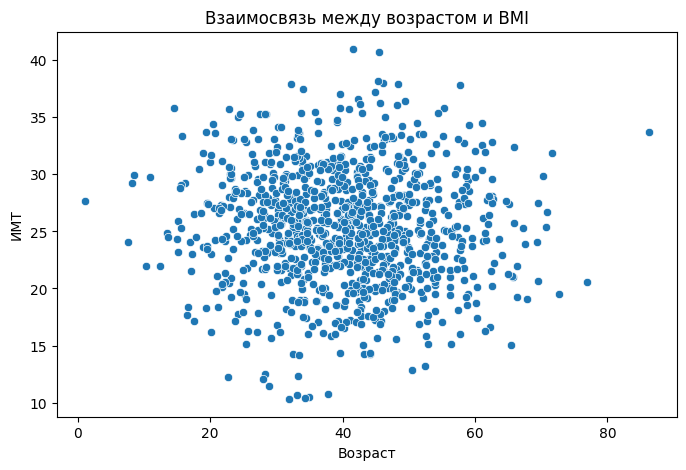

In [ ]:
# 1. Анализ взаимосвязи между возрастом и BMI
correlation_age_bmi = df['Age'].corr(df['BMI'])
print(f"Коэффициент корреляции между возрастом и ИМТ: {correlation_age_bmi:.2f}")

# Визуализация зависимости
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title("Взаимосвязь между возрастом и BMI")
plt.xlabel("Возраст")
plt.ylabel("ИМТ")
plt.show()

Коэффициент корреляции между возрастом и часами сна: 0.02


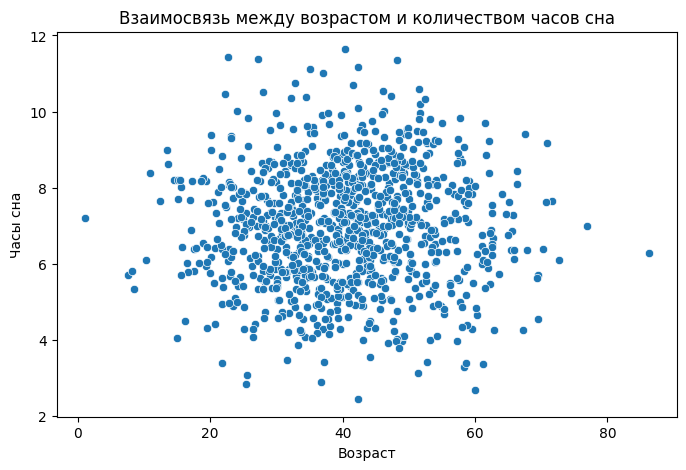

In [ ]:
# 2. Анализ взаимосвязи между возрастом и количеством часов сна
correlation_age_sleep = df['Age'].corr(df['Sleep_Hours'])
print(f"Коэффициент корреляции между возрастом и часами сна: {correlation_age_sleep:.2f}")

# Визуализация зависимости
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Sleep_Hours', data=df)
plt.title("Взаимосвязь между возрастом и количеством часов сна")
plt.xlabel("Возраст")
plt.ylabel("Часы сна")
plt.show()

In [ ]:
# 3. Анализ связи между курением и употреблением алкоголя
# Создаем новый столбец, где 1 — человек курит и употребляет алкоголь
# Устанавливаем порог для "много алкоголя" как 75-й процентиль
high_alcohol_threshold = df['Alcohol_Consumption'].quantile(0.75)

# Фильтрация данных: курящие люди с высоким употреблением алкоголя
smoking_and_high_alcohol = df[(df['Smoking_Status'] == 1) &
                              (df['Alcohol_Consumption'] > high_alcohol_threshold)]

# Подсчёт количества и доли таких людей
num_smoking_and_high_alcohol = smoking_and_high_alcohol.shape[0]
percentage_smoking_and_high_alcohol = num_smoking_and_high_alcohol / len(df) * 100

# Вывод результатов
print(f"Количество людей, которые курят и употребляют много алкоголя: {num_smoking_and_high_alcohol}")
print(f"Доля таких людей: {percentage_smoking_and_high_alcohol:.2f}%")



Количество людей, которые курят и употребляют много алкоголя: 116
Доля таких людей: 11.60%


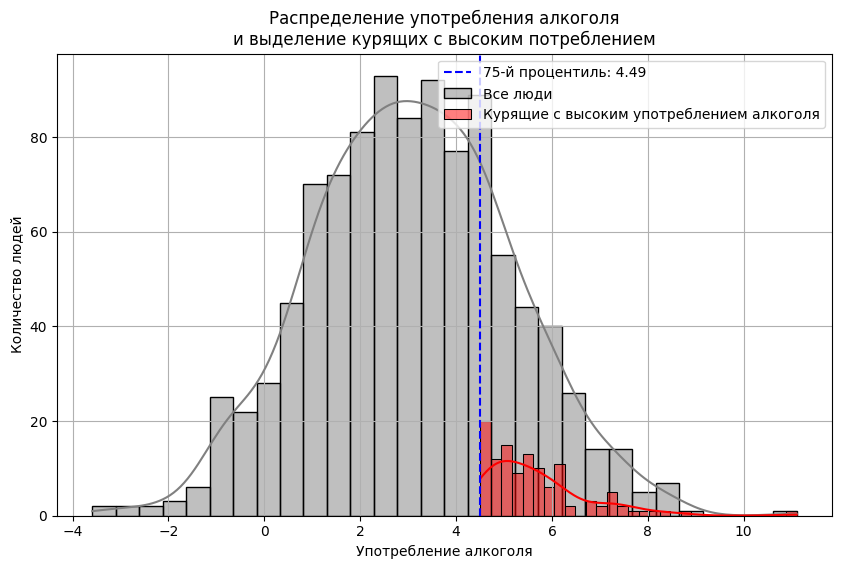

In [ ]:
# Визуализация: распределение употребления алкоголя
plt.figure(figsize=(10, 6))

# Гистограмма для всех людей
sns.histplot(df['Alcohol_Consumption'], bins=30, color='gray', label='Все люди', kde=True)

# Гистограмма для курящих людей с высоким уровнем употребления алкоголя
sns.histplot(smoking_and_high_alcohol['Alcohol_Consumption'], bins=30, color='red', label='Курящие с высоким употреблением алкоголя', kde=True)

# Вертикальная линия для порога "много алкоголя" (75-й процентиль)
plt.axvline(high_alcohol_threshold, color='blue', linestyle='--', label=f'75-й процентиль: {high_alcohol_threshold:.2f}')

# Настройка графика
plt.title('Распределение употребления алкоголя\nи выделение курящих с высоким потреблением')
plt.xlabel('Употребление алкоголя')
plt.ylabel('Количество людей')
plt.legend()
plt.grid()

# Показ графика
plt.show()

In [ ]:
# Добавление столбца BMI_prbl
df['BMI_prbl'] = df['BMI']**2

# Вывод обновленного DataFrame
print(df)

           Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0    45.960570  31.996777                   5     55.403270     7.300359   
1    38.340828  29.623168                   6     41.838357     7.012419   
2    47.772262  25.298152                   5     76.904948     6.028641   
3    58.276358  21.765316                   2     49.756767     5.802714   
4    37.190160  28.491117                   2     44.218737     7.912548   
..         ...        ...                 ...           ...          ...   
995  36.626796  30.350751                   1     60.674477     8.470913   
996  61.572238  24.867394                   3     66.527725     5.355398   
997  47.690114  20.590627                   4     69.819819     8.641864   
998  33.145852  24.184665                   6     70.724204     7.941557   
999  46.870993  21.275487                   0     63.555888     9.038352   

     Smoking_Status  Alcohol_Consumption  Health_Score     BMI_prbl  
0                

In [ ]:
df.columns

Index(['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
       'Smoking_Status', 'Alcohol_Consumption', 'Health_Score', 'BMI_prbl'],
      dtype='object')

In [ ]:
# Переставлем столбцы для удобства

df = df[['Health_Score', 'Age', 'BMI', 'BMI_prbl', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
       'Smoking_Status', 'Alcohol_Consumption']]
df

,Health_Score,Age,BMI,BMI_prbl,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption
0,70.542122,45.960570,31.996777,1023.793750,5,55.403270,7.300359,0,2.834707
1,57.244637,38.340828,29.623168,877.532107,6,41.838357,7.012419,1,7.199517
2,96.333722,47.772262,25.298152,639.996487,5,76.904948,6.028641,1,4.097944
3,61.321783,58.276358,21.765316,473.728985,2,49.756767,5.802714,1,3.649377
4,67.175894,37.190160,28.491117,811.743723,2,44.218737,7.912548,0,2.839795
...,...,...,...,...,...,...,...,...,...
995,67.993747,36.626796,30.350751,921.168098,1,60.674477,8.470913,0,3.823116
996,72.377621,61.572238,24.867394,618.387270,3,66.527725,5.355398,1,5.597395
997,100.000000,47.690114,20.590627,423.973910,4,69.819819,8.641864,0,8.195167
998,100.000000,33.145852,24.184665,584.898030,6,70.724204,7.941557,0,3.676134


                     Health_Score       Age       BMI  BMI_prbl  \
Health_Score             1.000000 -0.186939 -0.415147 -0.416461   
Age                     -0.186939  1.000000 -0.040400 -0.040133   
BMI                     -0.415147 -0.040400  1.000000  0.990147   
BMI_prbl                -0.416461 -0.040133  0.990147  1.000000   
Exercise_Frequency       0.245036  0.011829  0.007113  0.008714   
Diet_Quality             0.680686 -0.016554 -0.039968 -0.039262   
Sleep_Hours              0.269033  0.023491  0.034498  0.033408   
Smoking_Status          -0.109123  0.002250 -0.033797 -0.036303   
Alcohol_Consumption     -0.138264 -0.023532 -0.011069 -0.010717   

                     Exercise_Frequency  Diet_Quality  Sleep_Hours  \
Health_Score                   0.245036      0.680686     0.269033   
Age                            0.011829     -0.016554     0.023491   
BMI                            0.007113     -0.039968     0.034498   
BMI_prbl                       0.008714     -0.03

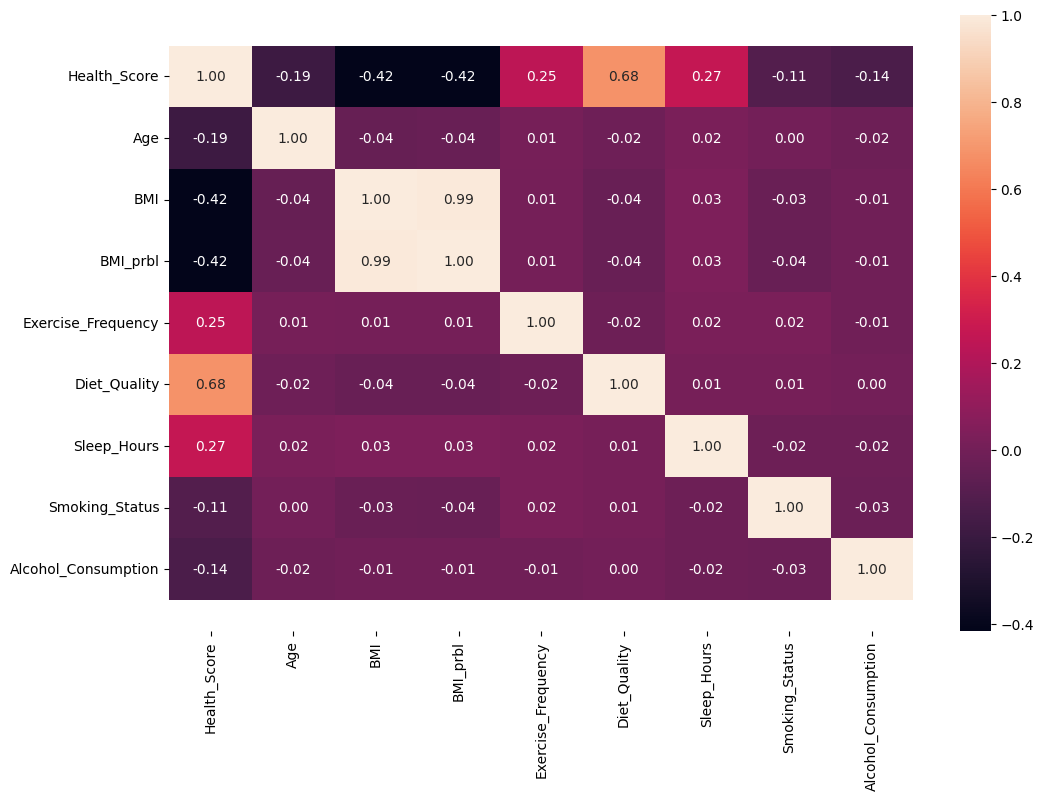

In [ ]:
# мы говорим о сильной корреляции, когда значение приближается к 1 или -1, и о ее отсутствии, когда значение близко к нулю.
# (Рассмотрим корреляцию > 0.7)
corr_matrix = df.corr('pearson')
print(corr_matrix)

# Визуально отобразим коллинеарность факторов
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.corr('pearson'), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

# Выявление коллинеарных факторов
high_corr = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
high_corr= high_corr[high_corr['level_0'] != high_corr['level_1']]
print("\nФакторы с высокой корреляцией:\n", high_corr)

Как видно, факторы BMI и BMI_prbl сильно коллерированы, соответсвенно, одновременно в модели присутствовать не могут

In [ ]:
import statsmodels.api as sm
from statsmodels.api import add_constant
# Функция для оценки значимости модели
def fit_model(X):
    X = sm.add_constant(X)  # Добавляем константу
    model = sm.OLS(df['Health_Score'], X).fit()
    return model

# Модель со всеми факторами
X = df[['Age', 'BMI', 'BMI_prbl', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
       'Smoking_Status', 'Alcohol_Consumption']]
model = fit_model(X)
print("Первоначальная модель:")
print(model.summary())

# Исключение наименее значимого фактора
while True:
    p_values = model.pvalues
    max_p = p_values.max()
    if max_p > 0.05:
        excluded_feature = p_values.idxmax()
        print(f"Исключаем фактор: {excluded_feature} с p-value: {max_p}")
        X = X.drop(columns=[excluded_feature])
        model = fit_model(X)
    else:
        break

print("Конечная модель:")
print(model.summary())

Первоначальная модель:
                            OLS Regression Results                            
Dep. Variable:           Health_Score   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     630.7
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:21:03   Log-Likelihood:                -3127.6
No. Observations:                1000   AIC:                             6273.
Df Residuals:                     991   BIC:                             6317.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

Один из сильно коллинированных факторов модель исключила. Остались только значимые.

Модель: y = β0 + β1Age + β2BMI_prbl + β3Exercise_Frequency + β4Diet_Quality + β5Sleep_Hours + β6Alcohol_Consumption

(Health_Score): Оценка здоровья - Целевая функция

  - const (константа): Коэффициент 50.2199 статистически значим (p < 0.001). Это значение представляет собой ожидаемое значение `Health_Score`, когда все независимые переменные равны нулю.

  - (BMI_prbl): увеличение индекса массы тела на 1 единицу приводит к снижению оценки здоровья на 0,0223

  - (Age): Увеличение возраста приводит к снижению оценки здоровья на 0,238

  - (Exercise_Frequency): Увеличение количества дней в неделю, в течение которых выполняются отдельные упражнения на 1 увеличивает оценку здоровья на 1,7858

  - (Diet_Quality): Увеличение показателя, отражающего качество питания на 1 единицу приводит к повышению оценки здоровья на 0,6060
  
  - (Sleep_Hours): Увеличение среднего количества часов сна за ночь на 1 приводит к повышению оценки здоровья на 2,4228
  
  - (Smoking_Status): Появление курения приводит к снижению оценки здоровья на 3,6714
  
  - (Alcohol_Consumption): Увеличение среднего количества единиц алкоголя, потребляемых в неделю на 1 единицу приводит к снижению оценки здоровья на 0,9313

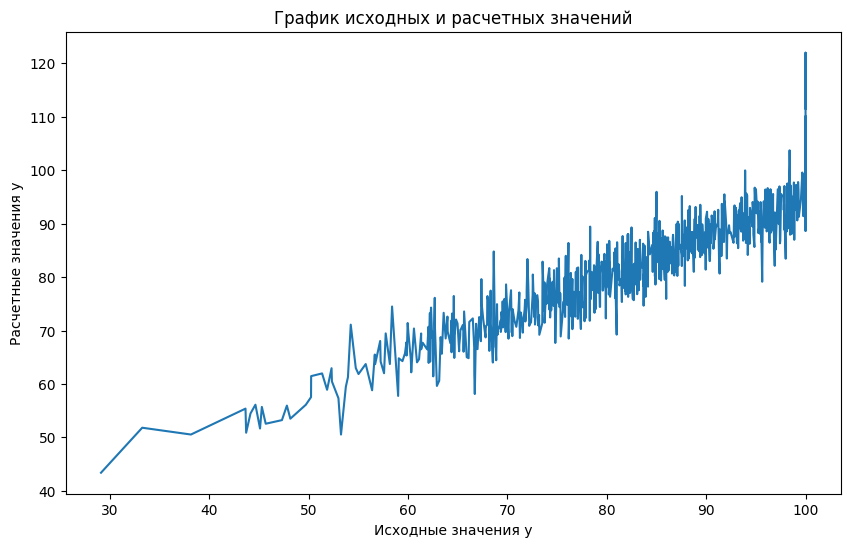

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor, LinearRegression
df = df.sort_values('Health_Score')
X = df[['Age', 'BMI_prbl', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
       'Smoking_Status', 'Alcohol_Consumption']]
y = df['Health_Score']

model = LinearRegression()
model.fit(X, y)

y_predicted = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(y, y_predicted)
plt.xlabel("Исходные значения y")
plt.ylabel("Расчетные значения y")
plt.title("График исходных и расчетных значений")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# Рассчитаем значение ошибок MSE и RMSE и R^2
mse = mean_squared_error(y, y_predicted)
rmse = root_mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('MSE = ', mse, '\nRMSE = ', rmse, '\nR^2 = ', r2)

MSE =  30.52117021076362 
RMSE =  5.524596836943274 
R^2 =  0.835638914928408


Анализ метрик качества регрессионной модели, предсказывающей оценки здоровья, демонстрирует удовлетворительные результаты.


    • Среднеквадратичная ошибка (MSE) составляет 30,5, что указывает на умеренную дисперсию между фактическими и прогнозными значениями

    • Средняя абсолютная ошибка (MAE), равная 5,5, представляет собой более интерпретируемую меру точности, демонстрирующую среднее отклонение прогноза от реального значения

    • Высокий коэффициент детерминации (R²) — 0.84 — свидетельствует о том, что модель объясняет значительную долю (84%) вариации в целевой переменной

В совокупности эти результаты указывают на приемлемую точность модели для задач прогнозирования оценок здоровья.